In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [3]:
ls

 3scene/
'Copy of Tugas_Indiv_02_SLO.ipynb'
'Copy of Untitled0.ipynb'
 data_cancer.csv
 Tugas_Indiv_02_SLO.ipynb
'UTS_SLO_Ant.Ardath Kristi_2101202064.ipynb'


In [4]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [5]:
# grab all image paths in the input dataset directory,then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("3scene")
data = []
labels = []

[INFO] loading images...


In [6]:
#loop over our input images
for imagePath in imagePaths:
  # load the input from disk, resize it to 64x64 pixel, scale
  # the pixelintensities to the range [0,1], and the update our
  # images list
  image = Image.open(imagePath)
  #bisa pasang preprocessing disini jika mau, seperti filterring, dll
  image = np.array(image.resize((128,128))) / 255.0 # untuk normalisasi maka di bagi 255.0
  data.append(image)

  # extract the class label from the file path and update the
  # labels list
  label = imagePath.split(os.path.sep)[-2]
  labels.append(label)

In [7]:
print(labels)

['forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest',

In [8]:
# encode the labels,converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [9]:
print(labels)

[[0 1 0]
 [0 1 0]
 [0 1 0]
 ...
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [10]:
print(np.array(data).shape)

(948, 128, 128, 3)


In [11]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evalution
(trainX, testX, trainY, testY) = train_test_split(np.array(data), np.array(labels), test_size=0.25)
print(trainX.shape)
print(testX.shape)

(711, 128, 128, 3)
(237, 128, 128, 3)


In [216]:
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense, Dropout

model = Sequential(
    [
        Flatten(input_shape=(128*128*3,)),
        Dense(512, activation="relu"),
        Dense(512, activation="relu"),
        Dropout(0.3),
        Dense(128, activation="relu"),
        Dense(128, activation="relu"),
        Dropout(0.3),
        Dense(32, activation="relu"),
        Dense(3, activation = "softmax"),
    ]
)

In [218]:
model.summary()

Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_44 (Flatten)         (None, 49152)             0         
_________________________________________________________________
dense_269 (Dense)            (None, 512)               25166336  
_________________________________________________________________
dense_270 (Dense)            (None, 512)               262656    
_________________________________________________________________
dropout_44 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_271 (Dense)            (None, 128)               65664     
_________________________________________________________________
dense_272 (Dense)            (None, 128)               16512     
_________________________________________________________________
dropout_45 (Dropout)         (None, 128)             

In [219]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=50, batch_size=32)

[INFO] training network...
Epoch 1/50
23/23 [==============================] - 1s 22ms/step - loss: 7.0238 - accuracy: 0.3540 - val_loss: 1.0978 - val_accuracy: 0.4430
Epoch 2/50
23/23 [==============================] - 0s 13ms/step - loss: 1.8911 - accuracy: 0.4241 - val_loss: 1.1136 - val_accuracy: 0.3713
Epoch 3/50
23/23 [==============================] - 0s 13ms/step - loss: 1.3006 - accuracy: 0.4201 - val_loss: 1.0119 - val_accuracy: 0.4810
Epoch 4/50
23/23 [==============================] - 0s 13ms/step - loss: 1.1713 - accuracy: 0.4113 - val_loss: 0.9802 - val_accuracy: 0.5021
Epoch 5/50
23/23 [==============================] - 0s 13ms/step - loss: 1.0670 - accuracy: 0.4926 - val_loss: 0.8847 - val_accuracy: 0.5485
Epoch 6/50
23/23 [==============================] - 0s 13ms/step - loss: 0.9625 - accuracy: 0.5209 - val_loss: 0.8211 - val_accuracy: 0.6203
Epoch 7/50
23/23 [==============================] - 0s 13ms/step - loss: 0.8652 - accuracy: 0.5764 - val_loss: 0.8976 - val_acc

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


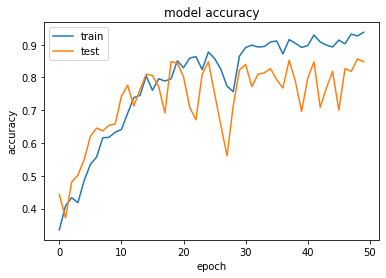

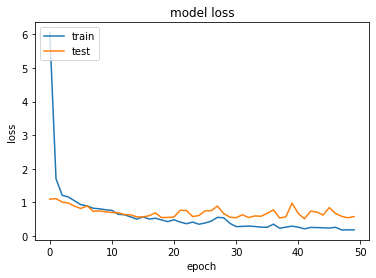

In [220]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [221]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

       coast       0.86      0.84      0.85        92
      forest       0.96      0.84      0.89        79
     highway       0.74      0.88      0.81        66

    accuracy                           0.85       237
   macro avg       0.85      0.85      0.85       237
weighted avg       0.86      0.85      0.85       237

